<a href="https://colab.research.google.com/github/Luna-luv/Kaggle_Study/blob/main/Rain%20in%20Australia/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/weatherAUS.csv'

# Importing libraries


### from keras.layers import ...
- `dense` : 완전 연결 층
- `BatchNormalization` : 배치 정규화, 학습 안정화 및 속도 향상
- `Dropout` : 과적합 방지를 위한 노드 무작위 제거
- `LSTM` : 시계열 데이터 처리에 강한 순환신경망의 한 종류

```python
from keras.models import Sequential
```
모델을 순차적으로 쌓는 구조를 만들 때 사용

```python
from keras.utils import to_categorical
```
레이블을 원-핫 인코딩 형식으로 변환

```python
from tensorflow.keras import regularizers
```
과적합 방지를 위한 정규화(L1, L2)를 설정할 때 사용

```python
from sklearn.metrics import...
```
모델의 성능을 평가할 때 사용

```python
from keras import callbacks
```
학습 도중 특정 조건을 만족할 때 중단, 저장, 로깅 등 자동화 가능

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

# Loading data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Visualization and Cleaning
steps involved in this section :
- count plot of target column
- correlation amongst numeric attributes
- parse dates into datetime
- encoding days and months as continuous cyclic features

<ipython-input-7-2f346c1e6684>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

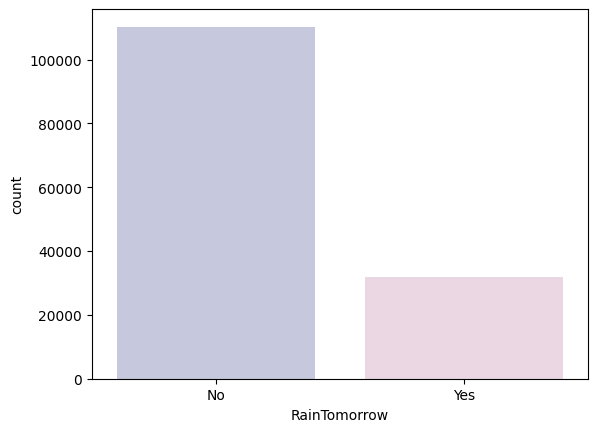

In [7]:
cols = ["#C2C4E2","#EED4E5"]
sns.countplot(x=data["RainTomorrow"], palette= cols)

In [8]:
numeric_data = data.select_dtypes(include=['number'])

```python
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
```
`diverging_palette()` : 양쪽으로 분기된 색상 스펙트럼을 만들어줌
- `260, -10` : 색상 시작점과 끝점(Hue 값)
- `s=50` : 채도(saturation)
- `l=75` : 명도(lightness)
- `n=6` : 단계 수(색상의 개수)
- `as_cmap=True` : colormap 형태로 변환(heatmap 에 바로 사용 가능)

<Axes: >

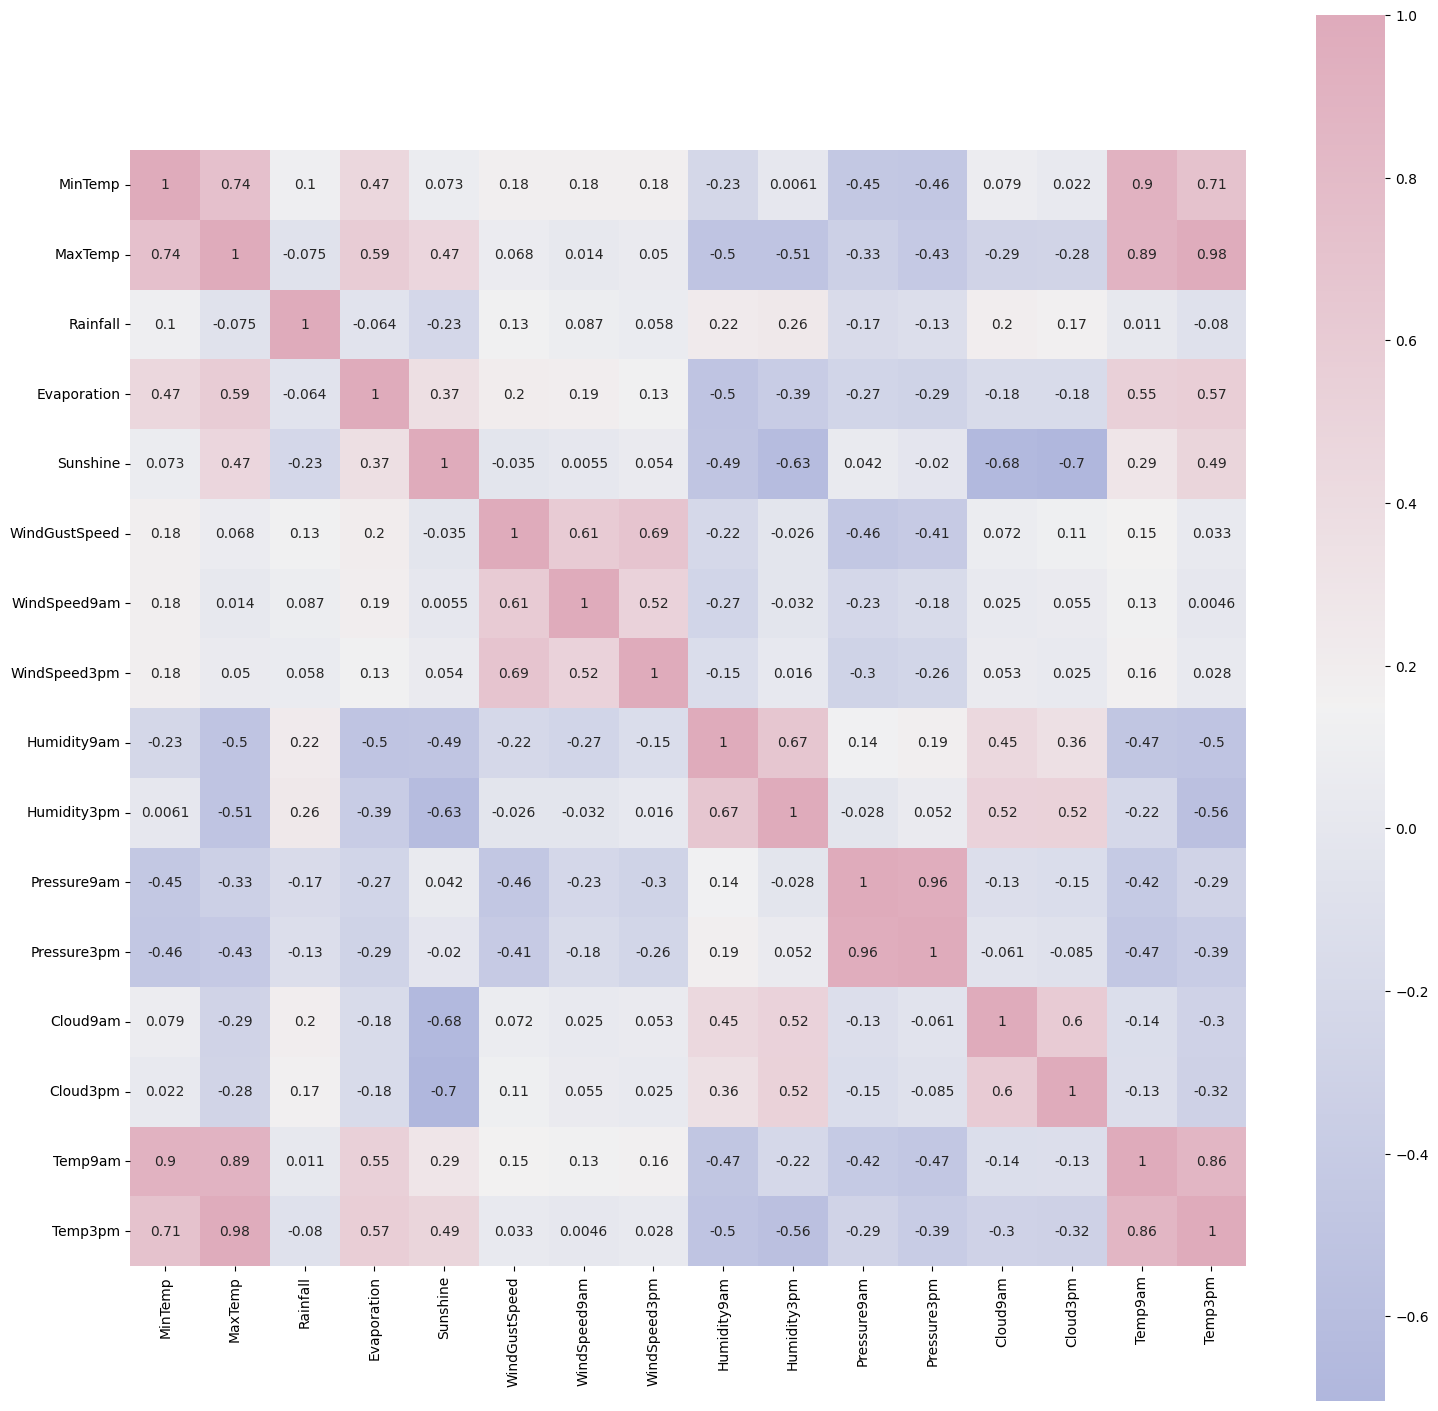

In [9]:
corrmat = numeric_data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [10]:
lengths = data["Date"].str.len()
lengths.value_counts()

,count
Date,
10,145460


```
date 데이터 길이 확인 겸 오류 없음을 확인함
```

In [11]:
data['Date']= pd.to_datetime(data["Date"]) # 문자열을 datetime 객체로 변환
data['year'] = data.Date.dt.year

In [12]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [13]:
data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

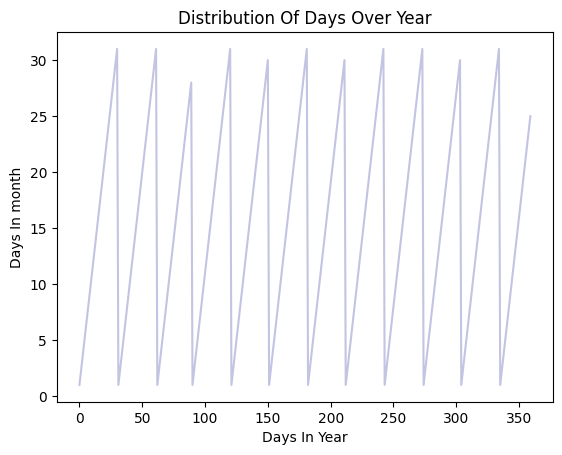

In [14]:
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

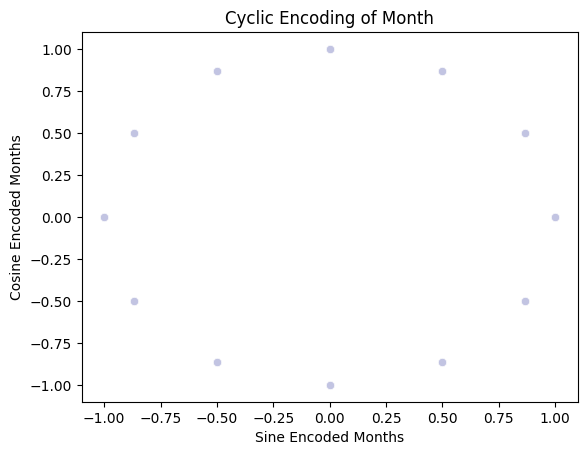

In [15]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

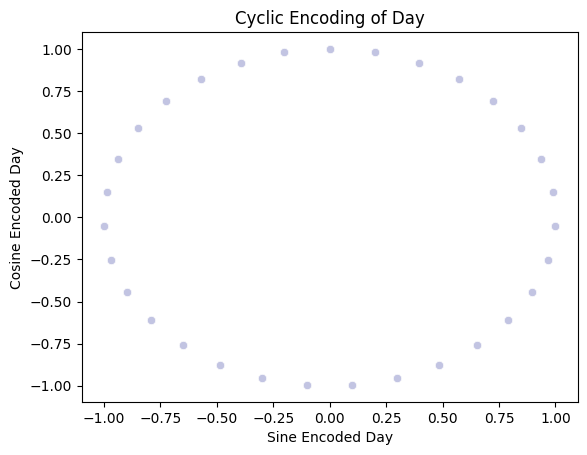

In [16]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

## Categorical variables
filling missing values with mode of the column value

In [19]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables :")
print(object_cols)

Categorical variables :
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
for i in object_cols:
  print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [21]:
for i in object_cols:
  data[i].fillna(data[i].mode()[0], inplace=True)

<ipython-input-21-ebc27958d453>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


## Numerical variables
filling missing values with median of the column value

In [23]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [24]:
for i in num_cols:
  print(i, data[i].isnull().sum())


MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [25]:
for i in num_cols:
  data[i].fillna(data[i].median(), inplace=True)

data.info()

<ipython-input-25-990fdce1f8e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

# Data Preprocessing
steps involved in data preprocessing:
- label encoding coulumns with categorical data
- perform the scaling of the features
- detecting outliers
- dropping the outliers based on data analysis

## label encoding the categorical variable

`sklearn.preprocessing.LabelEncoder`를 사용해서 문자(범주형)를 정수값으로 매핑하는 객체 생성
- `fit_transform()` 으로 문자 -> 정수 변환

### 왜 하는가??
- 머신러닝/신경망 모델은 문자나 문자열을 직접 처리하지 못하기 때문에 **정수나 벡터**로 인코딩 必

⚠️ `LabelEncoder`는 숫자에 순서를 부여해버림 -> **서열 관계가 없는 범주형 변수 사용시 주의**
- ex. red -> 0, blue -> 1, green -> 2 이면 green이 크고 red가 작은 것처럼 인식됨. 그러나 실제 색깔에는 순서가 없음
=> 이 경우 `pd.get_dummies()`또는 `OneHotEncoder`를 사용하는 것이 나을 수 있음(모든 값이 0, 1로만 표현되기 때문)

❓그럼 왜 필자는 LabelEncoder를 사용하였는가

1) ANN은..
- 각 값을 embedding처럼 처리(벡터화하기 때문에 숫자는 단순히 인덱스일 뿐 서열의 의미가 미미해짐)
- 내부적으로 비선형 변환이 들어가서 0, 1, 2 사이의 단순한 수치적 차이가 크게 의미 없을 수 있음
- 특히 범주 수가 적고 모델이 깊다면 이 효과는 더 미미

2) 범주 수가 너무 많거나 희소한 경우 **one-hot 은 너무 비효율적**
-> 이 경우 LabelEncoder + Embedding layer 가 더 효율적

3) 모델 트리 기반이 아닌 딥러닝이기에
- 트리 모델은 **숫자 간 비교 연산**을 하므로 LabelEncoder가 잘못된 순서 정보를 줄 수 있음
- ANN은 비교 연산보다 **가중치 학습**에 초점이 있어서 숫자값이 상대적으로 덜 중요할 수 있음

In [27]:
label_encoder = LabelEncoder()
for i in object_cols :
  data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

### Standardization 데이터 표준화 과정
- 각 열을 평균 0, 표준편차 1로 변환해서 신경망 학습에 유리하기 함

In [29]:
features = data.drop(['RainTomorrow', 'Date', 'day', 'month'], axis=1) # target & extra columns drop
target = data['RainTomorrow']

col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


### boxenplot vs boxplot
| 구분         | boxplot                         | boxenplot                                |
|--------------|----------------------------------|-------------------------------------------|
| 요약 정보    | 중앙값, 사분위수, 이상치         | 더 많은 분위수(quantiles)로 분포를 자세히 표시 |
| 데이터 크기  | 소~중간 규모 데이터에 적합       | **큰 규모 데이터**에 더 유리               |
| 시각화 밀도  | 단순                             | 더 정밀하게 층화된 구조                    |
| 이상치 표현  | O                                | O                                         |
| 활용 목적    | 기본적인 분포 확인               | **분포 형태를 더 깊이 분석**할 때 사용     |


- standardScaler는 모든 특성의 스케일을 같게 맞춰줄뿐, 왜도를 해결해주는 것은 아님 -> boxenplot을 사용해 outlier detect

<ipython-input-30-1ae9fffce728>:3: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


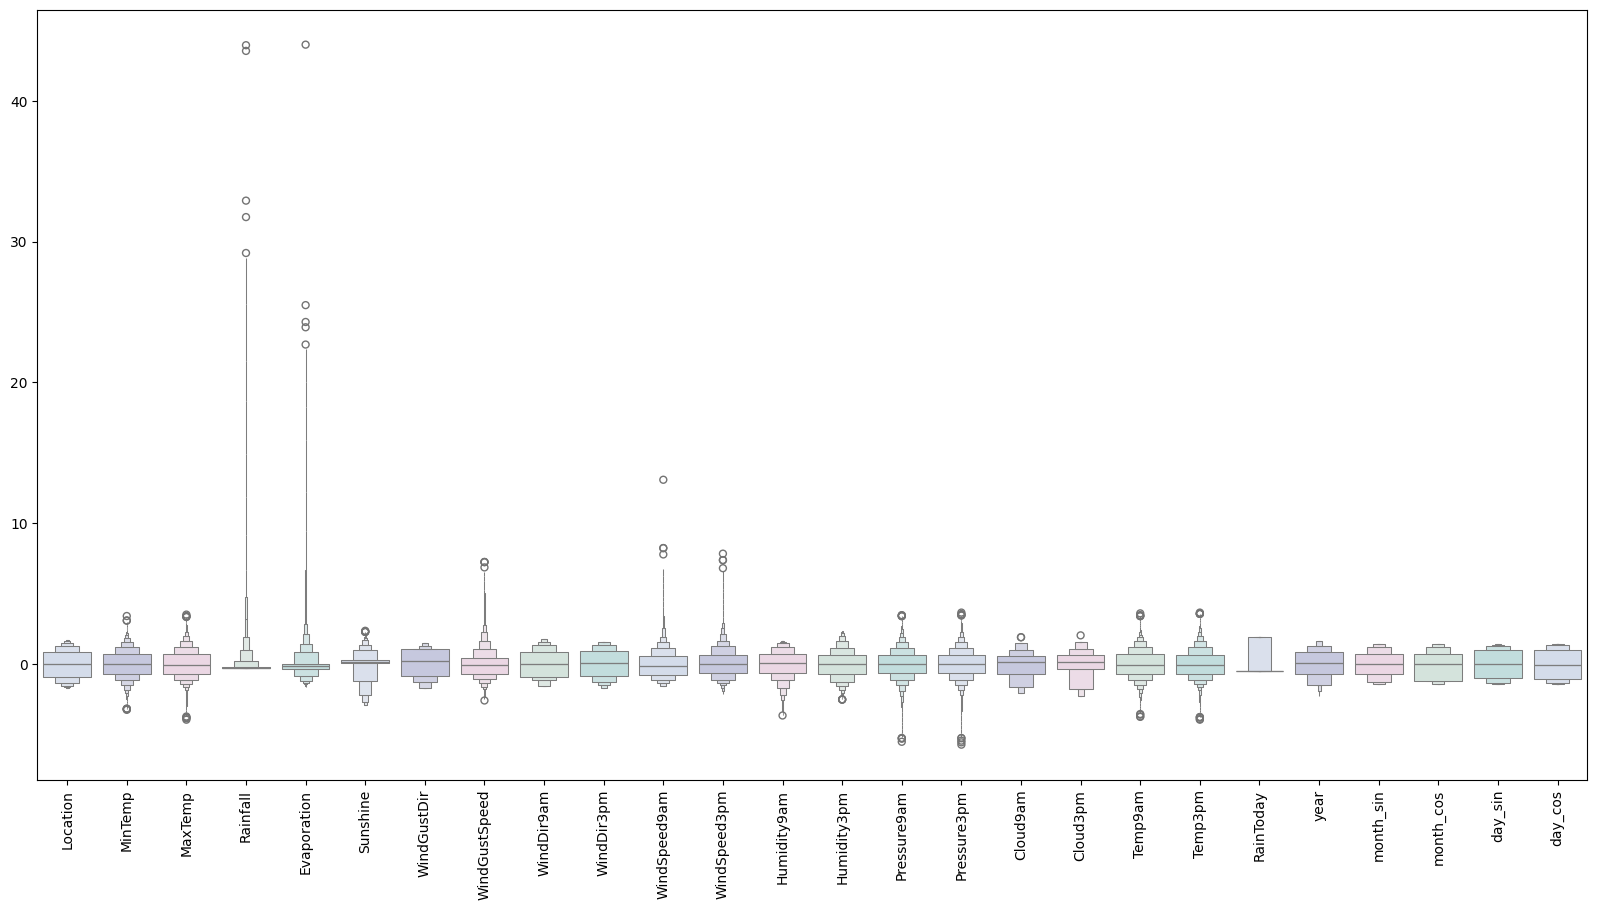

In [30]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

```
- 박스가 두꺼울수록 데이터가 중간에 몰려있고
- 박스가 얇고 길수록 분산이 크며, 이상치가 많음
-> rainfall, evaporation, windgustspeed(박스가 길고 이상치 많으므로 불균형/치우침 알 수 있음), month_sin, day_sin, year, raintoday(박스넓이 균일하므로 정규분포처럼 잘 분포됨을 알 수 있음)
```

In [31]:
features["RainTomorrow"] = target

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

features.shape

(127536, 27)

```
동그라미(이상치)가 있는애들만 나와있으므로 필자가 그냥 boxenplot을 보고 숫자를 임의로 정한듯(동그라미부분이 잘리도록)
```

boxenplot without outliers

<ipython-input-32-d3a7b3e4bca7>:2: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


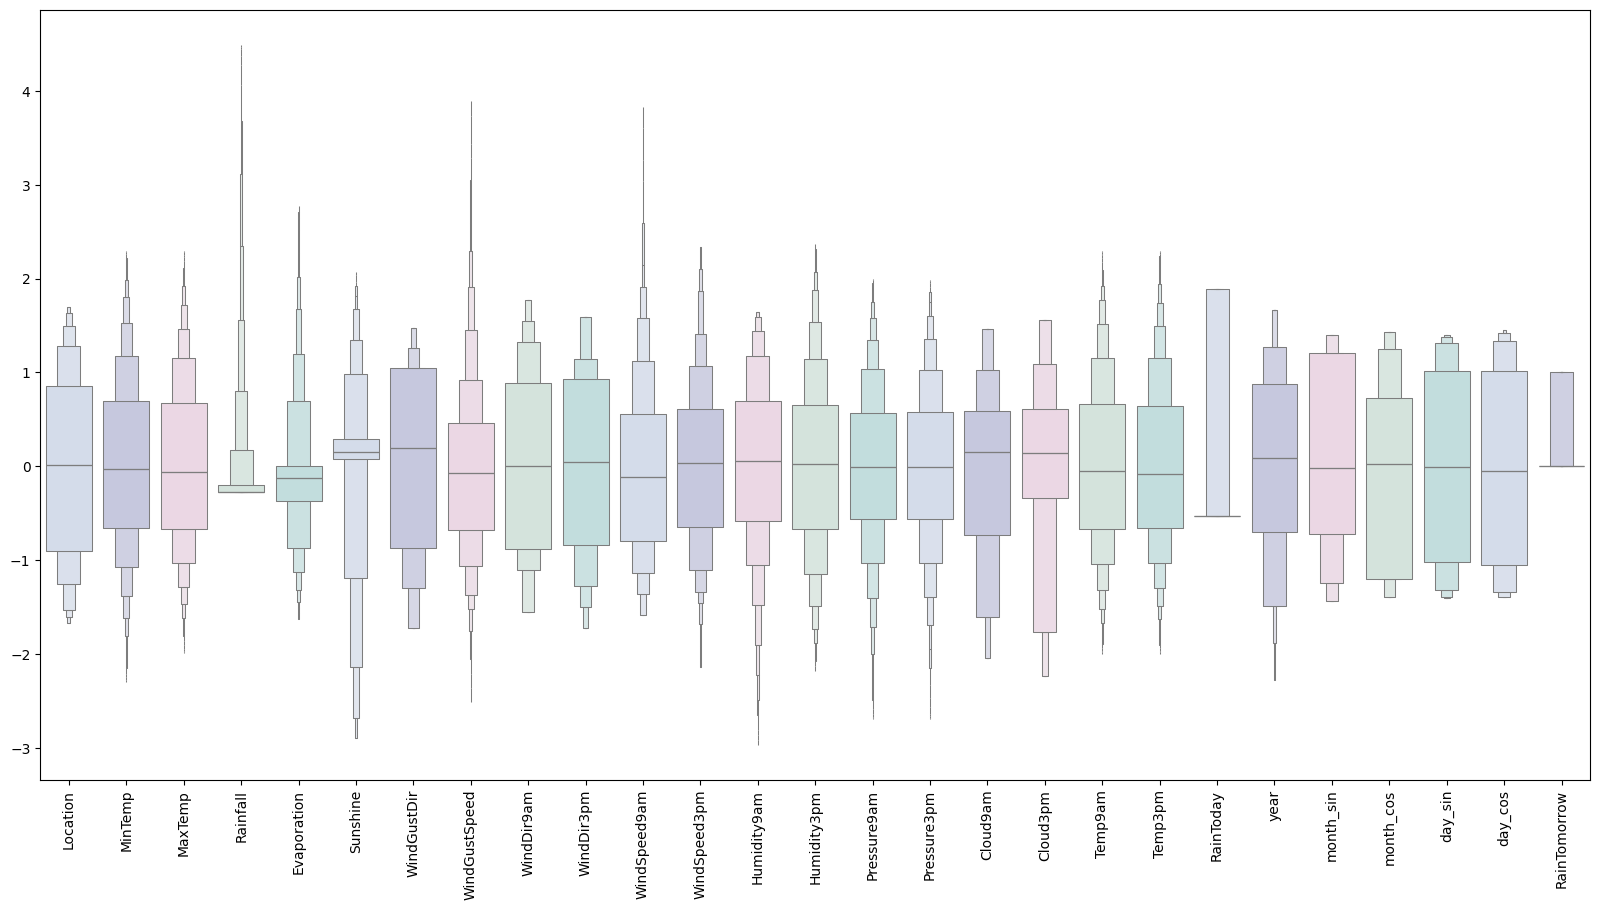

In [32]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Model Building
following steps are involved in the model building
- assigning X and y the status of attributes and tags
splitting test and training sets
- initializing the neural network
- defining by adding layers
- compiling the neural network
- train the neural network


In [33]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

### `EarlyStopping`
- 20 에폭 연속으로 성능 향상 없으면 학습 종료
- `min_delta=0.001`: 성능 향상이 최소한 이 수치 이상일 때만 진짜 개선으로 봄
- `restore_best_weights=True`: 조기 종료되더라도 가장 성능 좋았던 지점의 가중치 복원

### Sequential 구조
- Sequential : 순차적으로 레이어를 쌓는 모델 구조
```python
model.add(Dense(units=32, activation='relu', input_dim=26))
```
  - 첫 번째 은닉층
  - 32개의 뉴런, ReLU 함수 활성화
  - 입력 특성 수는 26개(X_train.shape[1] = 26)

```python
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
```
  - 은닉층 추가 + 드롭아웃(과적합 방지)
  - 점점 유닛수를 줄여가며 정보 압축

```python
model.add(Dense(1, activation='sigmoid'))
```
- 출력층
- sigmoid는 이진 분류용 -> 확률 값(0~1) 출력

### 컴파일
```python
opt = Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
```
- 옵티마이저 : Adam + 낮은 학습률(0.00009)
- 손실함수 : `binary_crossentropy`(이진분류용)
- 평가지표 : accuracy

### 모델 학습
```python
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping]
)
```
- 훈련 데이터의 20%를 validation 데이터로
- 최대 150 에폭 돌리되 개선 없으면 조기 종료
- 매 에폭마다 accuracy, val_accuracy 등을 기록해서 history에 저장


## 목표 : 딥러닝으로 이진 분류
- 어떤 데이터를 보고 1일지, 0일지(내일 비올지 안올지) 예측하는 모델

#### STEP 1 : EarlyStopping(너무 오래 학습하면 과적합이 생기니까 이를 방지하기 위함)
- 학습이 더 이상 의미 없을 때 자동으로 멈추는 장치

#### STEP 2 : Sequential 모델 시작
- 레이어를 순서대로 하나씩 쌓겠다는 의미

#### STEP 3 : 모델 레이어(신경망층) 구성
- input_dim = 26 : 입력 특성이 26개라는 뜻(ex. 나이, 기온, 습도 등)
- Dense 는 노드를 쌓는 층
- Dropout은 학습 중 일부 노드를 일시적으로 꺼서 과적합을 막는 장치
- sigmoid : 항상 출력이 0~1 사이이므로 확률처럼 사용 가능

#### STEP 4 : 모델 컴파일
- Adam : 요즘 많이 쓰는 스마트한 학습 방법(optimizer)
- learning_rate = 0.00009 : 학습 속도(낮을수록 천천히 배움)
- loss='binary_crossentropy' : 이진 분류 문제에서 예측이 얼마나 틀렸는지 측정하는 함수

#### STEP 5 : 모델 학습
- epochs=150 : 최대 150번 반복 학습해라
- batch_size=32 : 한 번에 32개씩 데이터를 처리하면서 학습


In [34]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7858 - loss: 0.5681 - val_accuracy: 0.7860 - val_loss: 0.3959
Epoch 2/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7854 - loss: 0.4296 - val_accuracy: 0.7860 - val_loss: 0.3894
Epoch 3/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7844 - loss: 0.4250 - val_accuracy: 0.7860 - val_loss: 0.3882
Epoch 4/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7848 - loss: 0.4180 - val_accuracy: 0.7860 - val_loss: 0.3861
Epoch 5/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7814 - loss: 0.4121 - val_accuracy: 0.7860 - val_loss: 0.3840
Epoch 6/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7863 - loss: 0.4075 - val_accuracy: 0.7860 - val_loss: 0.3826
Epoch 7/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7847 - loss: 0.4066 - val_accuracy: 0.7860 - val_loss: 0.3816
Epoch 8/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7852 - l

## plotting training and validation loss over epochs
딥러닝 학습 도중의 성능 변화(손실값)을 시각화
-> **과적합 여부나 학습 흐름을 확인**

> epoch(학습반복) 에 따라
> - Training loss(학습에 대한 오차)
> - Validation loss(검증 데이터에 대한 오차)
>
> 이 둘이 어떻게 변화했는지를 시각화해서 언제 학습이 멈췄고 과적합이 있었는지 확인

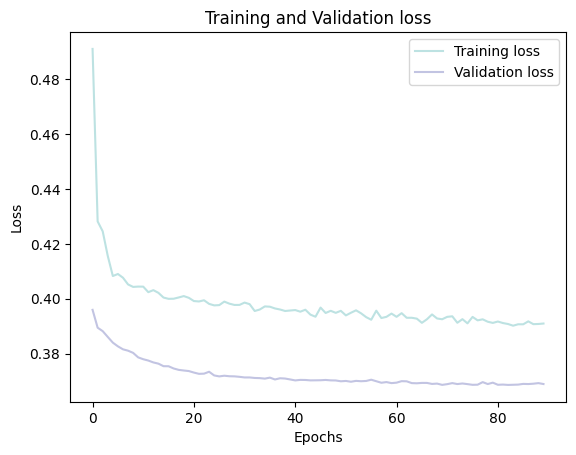

In [35]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

그래프 해석
- x축(Epochs) : 학습 반복 횟수
- y축(Loss) : 손실값

> - 0 ~ 10 에폭 : loss가 급격히 감소 -> 모델이 빠르게 학습 중
>
> - 10~90 에폭 : loss, val_loss 모두 천천히 감소하며 안정화
>
> - 전반적 형태 : val_loss가 loss 보다 항상 낮고, 계속 감소
>
> - 과적합 여부 : val_loss가 증가하는 구간이 없으므로 없음 -> 학습이 잘되었다는 뜻
>
> - earlystopping이 잘 적용되어 적절한 시점(약 90회)에서 멈춘 듯 보임

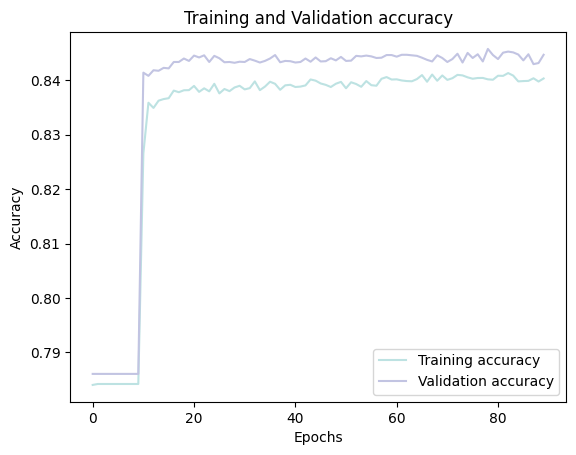

In [36]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

그래프 해석
- training/validation accuracy 모두 정확도 적절
- 보통은 training이 validation 보다 높은데, 여기선 반대 -> 훈련데이터에 약간 부족하게 적응했을 수도 있고, 오히려 좋은 일반화라고 볼 수도 있음

# Conclusion
Concluding the model with:
- Testing on the test set
- Evaluating the confusion matrix
- Evaluating the classification report

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


<Axes: >

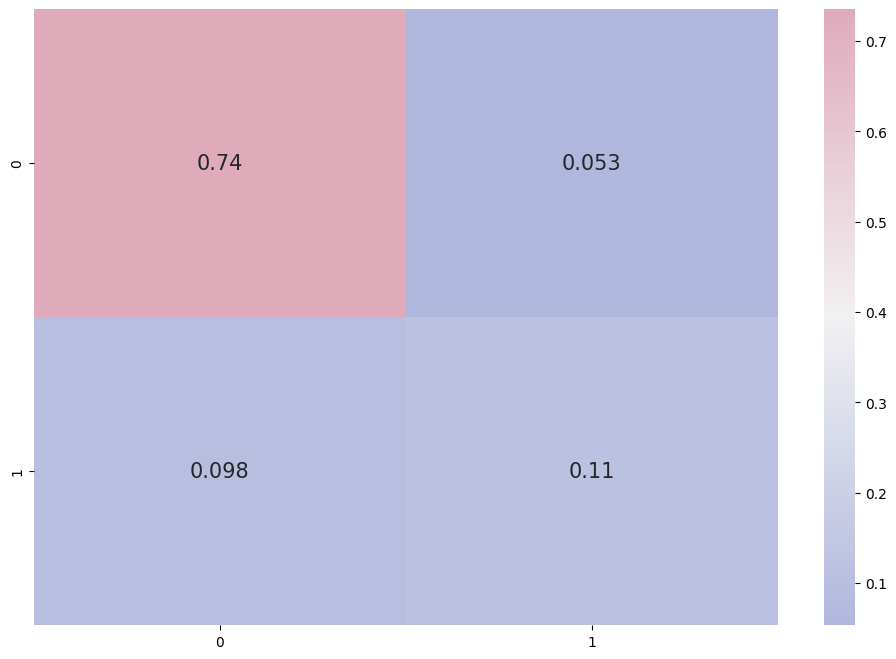

In [38]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     20110
           1       0.68      0.54      0.60      5398

    accuracy                           0.85     25508
   macro avg       0.78      0.73      0.75     25508
weighted avg       0.84      0.85      0.84     25508



TN : 실제 0이고 0으로 맞춤(정확하게 no 예측) -> 74%

FP : 실제 0인데 1로 틀림(과잉 예측) -> 5.3%

FN : 실제 1인데 0으로 틀림 -> 9.8%  

TP : 실제 1이고 1로 맞춤(정확하게 yes 예측) -> 11%

- Precision(1이라고 예측한 것 중 진짜 1인 비율) : 예측이 얼마나 정확했나
- Recall(진짜 1인 것 중 모델이 잘 맞춘 비율) : 놓치지 않고 잘 잡았나
- F1-score : Precision 과 Recall 의 평균 = 균형 평가 지표
- Support : 각 클래스의 실제 개수
- macro avg : 단순 평균 -> 전체적으로 class 1의 성능이 낮아 평균도 낮아짐
- weighted avg -> class별 샘플 수 반영 평균 -> 전체적으로 0.84w정도의 성능
---
🔍 결론
- 클래스의 불균형이 있음(0이 훨씬 많음)
- 모델은 0은 잘 예측, 1은 다소 놓침
- Recall 이 낮은 클래스 1 -> 예측 민감도 더 필요
  - 개선 제안 : oversampling, class weight 조정, threshold 튜닝 등


